In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time
 
from torchvision import datasets

In [0]:
tform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])

In [0]:
trainset = datasets.MNIST(root = './data',train = True,download = True, transform = tform)
 
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4,shuffle = True)
 
testset = datasets.MNIST(root = './data',train = False,download = True,transform = tform)
 
testloader = torch.utils.data.DataLoader(testset, batch_size = 4,shuffle = False)

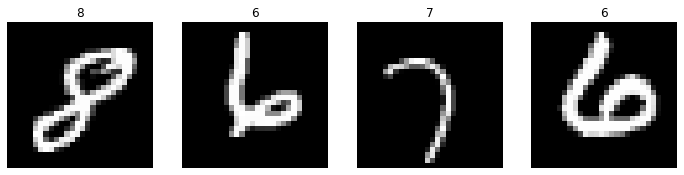

In [0]:
for b in trainloader:
    batch = b
    break

plt.figure(figsize=(12, 8))
for i in range (batch[0].shape[0]):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(int(batch[1][i]))
    plt.savefig('digit_mnist.png')
plt.show()

In [0]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=256, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [0]:
net = LeNet().to(device)
net

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [0]:
def train(net):

    for epoch in range(1): 
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
 
            running_loss += loss.item()
            if i % 3000 == 2999:                  #3000 batch
                print('[Epoch %d, %5d Mini Batches] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss/5000))
                running_loss = 0.0
    
train(net)

[Epoch 1,  3000 Mini Batches] loss: 0.532
[Epoch 1,  6000 Mini Batches] loss: 0.102
[Epoch 1,  9000 Mini Batches] loss: 0.068
[Epoch 1, 12000 Mini Batches] loss: 0.055
[Epoch 1, 15000 Mini Batches] loss: 0.057
